In [ ]:
!ls -al


total 16
drwxr-xr-x 1 root root 4096 Jan  5 14:34 .
drwxr-xr-x 1 root root 4096 Jan  6 20:20 ..
drwxr-xr-x 4 root root 4096 Jan  5 14:33 .config
drwxr-xr-x 1 root root 4096 Jan  5 14:34 sample_data


# Scatter Box-Plots from Main performance Results

In [ ]:
#from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

#data = load_iris(as_frame=True)
data_NoDAvsDA   = pd.read_csv('pps_accuracy_NoDAvsDA.csv', sep=';' )
data_backbones = pd.read_csv('pps_accuracy_backbones.csv', sep=';' )
data_per_pps_number = pd.read_csv('pps_accuracy_per_pps_number.csv', sep=';' )

#df = data.data
#df.head()

FileNotFoundError: ignored

In [ ]:
data_NoDAvsDA

In [ ]:
#data_NoDAvsDA.info()
#data_NoDAvsDA.dtypes
#data_NoDAvsDA.astype('int32').dtypes
data_NoDAvsDA.rename(columns={"NoDa":'No Data Augmentation'}, inplace=True)
data_NoDAvsDA.rename(columns={"DA":  'With Data Augmentation'}, inplace=True)

In [ ]:
# iterating the columns
for col in data_NoDAvsDA.columns:
    print(col)

In [ ]:
sns.boxplot(data=data_NoDAvsDA[['No Data Augmentation','With Data Augmentation']])

In [ ]:
#sns.color_palette("hls", 8)
plt.figure(figsize=(4,6))
#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(data=data_NoDAvsDA[['No Data Augmentation','With Data Augmentation']], saturation=0.65, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))


boxplot = sns.stripplot(data=data_NoDAvsDA[['No Data Augmentation','With Data Augmentation']], marker="o", size=7, alpha=1.0, palette='husl')  #"hls")#color="black") #Spectral
#boxplot.axes.set_title("Training with different Data Augmentation regimes", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set_ylabel("Average Accuracy", fontsize=14)
plt.savefig('pps_accuracy_NoDAvsDA.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
data_backbones

In [ ]:
#data_backbones = pd.read_csv('pps_accuracy_backbones.csv', sep=';' )
#data_per_pps_number = pd.read_csv('pps_accuracy_per_pps_number.csv', sep=';' )

#sns.color_palette("hls", 8)
plt.figure(figsize=(4,6))
#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(data=data_backbones[['DenseNet201','ResNet50', 'Vgg16']], saturation=0.65, palette='husl', width=0.4, fliersize= 0) # palette='husl' palette='Spectral' #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(data=data_backbones[['DenseNet201','ResNet50', 'Vgg16']], marker="o", size=7, alpha=1.0, palette='husl')  #"hls")#color="black") #Spectral
#boxplot.axes.set_title("ProtoPNet Accuracy  per Backbone", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set_ylabel("Average Accuracy", fontsize=14)
plt.savefig('Accuracy_per_Backbone.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
data_per_pps_number

In [ ]:
data_per_pps_number = data_per_pps_number.drop(columns= ["100 pp"])
data_per_pps_number

In [ ]:
#data_backbones = pd.read_csv('pps_accuracy_backbones.csv', sep=';' )
#data_per_pps_number = pd.read_csv('pps_accuracy_per_pps_number.csv', sep=';' )

#sns.color_palette("hls", 8)
plt.figure(figsize=(5,6))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(data=data_per_pps_number[['1 pp','3 pp', '10 pp', '50 pp']], saturation=0.65, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(data=data_per_pps_number[['1 pp','3 pp', '10 pp', '50 pp']], marker="o", size=7, alpha=1.0, palette='husl')  #"hls")#color="black") #Spectral
#boxplot.axes.set_title("Accuracy per numberof PPs", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set_ylabel("Average Accuracy", fontsize=14)
plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
plt.savefig("Accuracy_per_pps_numbers.pdf", format="pdf", bbox_inches="tight")
#plt.savefig('Accuracy_per_pps_numbers.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
#data_backbones = pd.read_csv('pps_accuracy_backbones.csv', sep=';' )
#data_per_pps_number = pd.read_csv('pps_accuracy_per_pps_number.csv', sep=';' )

#sns.color_palette("hls", 8)
plt.figure(figsize=(5,6))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
plt.vlines(x=0.85, ymin=0, ymax=6, color='#ff3300', linestyle='--', linewidth=1.35)
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
#data_per_pps_number_2 = data_per_pps_number.T.boxplot(vert=False)
boxplot = sns.boxplot(data=data_per_pps_number_2[['1 pp','3 pp', '10 pp', '50 pp']], saturation=0.65, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(data=data_per_pps_number[['1 pp','3 pp', '10 pp', '50 pp']], marker="o", size=7, alpha=1.0, palette='husl')  #"hls")#color="black") #Spectral
#boxplot.axes.set_title("Accuracy per numberof PPs", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set_ylabel("Average Accuracy", fontsize=14)
plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
plt.savefig("Accuracy_per_pps_numbers.pdf", format="pdf", bbox_inches="tight")
#plt.savefig('Accuracy_per_pps_numbers.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
## Original reference code to plot Iris dataset plots
"""
plt.figure(figsize=(10,15))
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(datdata_per_pps_numbera_NoDAvsDA))
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(data_per_pps_number), marker="o", alpha=0.2, color="black")
boxplot.axes.set_title("Iris BoxPlot", fontsize=16)
boxplot.set_xlabel("Features", fontsize=14)
boxplot.set_ylabel("Distribution", fontsize=14)
plt.savefig('data_per_pps_number.png')
plt.show()
#"""

# Test Local Descriptors

In [ ]:
#from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_theme()

# DenseNet201_JE_6c_Mix_w256_run1_015_003pps_OsDAtestset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv
# DenseNet201_JE_6c_Mix_w256_run1_015_003pps_OsDAtestset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv
# DenseNet201_JE_6c_Mix_w256_run1_015_003pps_OsDAtrainingset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv
# DenseNet201_JE_6c_Mix_w256_run1_015_003pps_OsDAtrainingset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv

#data = load_iris(as_frame=True)      
Test_Local_descriptors   = pd.read_csv('DenseNet201_JE_6c_Mix_w256_run1_015_003pps_OsDAtestset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )
#Test_Global_descriptors  = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )

#Train_Local_descriptors  = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtrainingset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )
#Train_Global_descriptors = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtrainingset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv' , sep=',' )

#df = data.data
#df.head()

In [ ]:
Test_Local_descriptors

In [ ]:
#create boxplot
#boxplot = Test_Local_descriptors.boxplot(figsize = (5,5))  #column = None by= None, ax= None, fontsize= None, rot= 0, grid:bool = True, figsize = (5,5), layout = None, return_type= None, backend= None, **kwargs)
boxplot = Test_Local_descriptors.boxplot(column = 'delta',  by= 'modification', fontsize= 12, rot= 45, figsize = (10,5) )#, grid:bool = True, ax= None, layout = None, return_type= None, backend= None, **kwargs)

In [ ]:
#boxplot = Test_Local_descriptors.boxplot(column = 'delta',  by= 'modification', fontsize= 12, rot= 45, figsize = (10,5) )#, grid:bool = True, ax= None, layout = None, return_type= None, backend= None, **kwargs)
#
#sns.color_palette("hls", 8)
plt.figure(figsize=(8,4))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(x="modification", y="delta", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(x="modification", y="delta", data=Test_Local_descriptors, marker="o", size=1, alpha=0.30, palette='husl')  #"hls")#color="black") #Spectral
boxplot.axes.set_title("Descriptors for Test Images", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set(xlabel=None)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
boxplot.tick_params(labelsize=12)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
#plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
plt.savefig("Descriptors_for_Test_Images.pdf", format="pdf", bbox_inches="tight")
#plt.savefig('Accuracy_per_pps_numbers.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
# Group the data by 'modification' and get the mean 'delta' value of each modification category
mean_values = Test_Local_descriptors.groupby('modification')['delta'].mean()
# Print the resulting Series
print(mean_values)

In [ ]:
# Convert the 'mean_values' Series into a DataFrame and rename the columns
mean_Descriptors_values_df = mean_values.reset_index().rename(columns={'modification': 'Modification', 'delta': 'Mean PPs delta (Descriptor Activation)'})

# Create a bar chart
sns.barplot(x='Modification', y='Mean PPs delta (Descriptor Activation)', data=mean_Descriptors_values_df, hue='Modification', palette='husl')
# Show the plot
plt.show()
# Print the resulting DataFrame
print(mean_Descriptors_values_df)
# Print the main statistical values of the different Descriptors (deltas of PPs activations for the used modifications on the input images) 
#print(mean_Descriptors_values_df.describe())

In [ ]:
# Get the maximum value of 'delta' 
max_test_delta = Test_Local_descriptors['delta'].max()

# Divide 'normalized_modifiers' by the maximum value for each group
Test_Local_descriptors['normalized_modifiers'] = Test_Local_descriptors['delta'] / max_test_delta

In [ ]:
#boxplot = Test_Local_descriptors.boxplot(column = 'delta',  by= 'modification', fontsize= 12, rot= 45, figsize = (10,5) )#, grid:bool = True, ax= None, layout = None, return_type= None, backend= None, **kwargs)
#
#sns.color_palette("hls", 8)
plt.figure(figsize=(8,4))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(x="modification", y="normalized_modifiers", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(x="modification", y="normalized_modifiers", data=Test_Local_descriptors, marker="o", size=1, alpha=0.30, palette='husl')  #"hls")#color="black") #Spectral
boxplot.axes.set_title("Normalized Descriptors for Test Images", fontsize=14)
boxplot.set(xlabel=None)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
boxplot.tick_params(labelsize=12)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
#plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
plt.savefig("Normalized_Descriptors_for_Test_Images.pdf", format="pdf", bbox_inches="tight")
#plt.savefig('Accuracy_per_pps_numbers.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Test Global Descriptors

In [ ]:
#from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_theme()

#data = load_iris(as_frame=True)
#Test_Local_descriptors   = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )
Test_Global_descriptors  = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )

#Train_Local_descriptors  = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtrainingset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )
Train_Global_descriptors = pd.read_csv( 'DenseNet201_JE_6c_Mix_w256_003pps_OsDAtrainingset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv' , sep=',' )

#df = data.data
#df.head()


In [ ]:
Train_Global_descriptors['modification']

In [ ]:
Train_Global_descriptors['modification'] = Train_Global_descriptors['modification'].map({'brightness':'Brightness', 'contrast':'Contrast', 'hue':'Hue', 'saturation':'Saturation', 'shape':'Shape', 'texture':'Texture'})
Train_Global_descriptors['modification']

In [ ]:
Test_Global_descriptors

In [ ]:
#sns.color_palette("hls", 8)
plt.figure(figsize=(8,4))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(x="modification", y="weighted_delta", data=Test_Global_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(x="modification", y="weighted_delta", data=Test_Global_descriptors, marker="o", size=5, alpha=0.90, palette='husl')  #"hls")#color="black") #Spectral
boxplot.axes.set_title("Global Descriptors for Test Images", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=12)
boxplot.set(xlabel=None)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
boxplot.tick_params(labelsize=12)
#plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
plt.savefig("Global_Descriptors_for_Test_Images.pdf", format="pdf", bbox_inches="tight")
#plt.savefig('Accuracy_per_pps_numbers.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
# Get the maximum value of 'weighted_delta' 
max_test_weighted_delta = Test_Global_descriptors['weighted_delta'].max()

# Divide 'modifiers' by the maximum value of 'weighted_delta'
Test_Global_descriptors['normalized_modifiers'] = Test_Global_descriptors['weighted_delta'] / max_test_weighted_delta

In [ ]:
#boxplot = Test_Local_descriptors.boxplot(column = 'delta',  by= 'modification', fontsize= 12, rot= 45, figsize = (10,5) )#, grid:bool = True, ax= None, layout = None, return_type= None, backend= None, **kwargs)
#
#sns.color_palette("hls", 8)
plt.figure(figsize=(8,4))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(x="modification", y="normalized_modifiers", data=Test_Global_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(x="modification", y="normalized_modifiers", data=Test_Global_descriptors, marker="o", size=5, alpha=0.90, palette='husl')  #"hls")#color="black") #Spectral
boxplot.axes.set_title("Normalized Global Descriptors for Test Images", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set(xlabel=None)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
boxplot.tick_params(labelsize=12)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
#plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
plt.savefig("Normalized_Global_Descriptors_for_Test_Images.pdf", format="pdf", bbox_inches="tight")
#plt.savefig('Accuracy_per_pps_numbers.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Train Local Descriptors

In [ ]:
#from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_theme()

#data = load_iris(as_frame=True)
#Test_Local_descriptors   = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )
#Test_Global_descriptors  = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )

Train_Local_descriptors  = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtrainingset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )
#Train_Global_descriptors = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtrainingset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv' , sep=',' )

#df = data.data
#df.head()

In [ ]:
Train_Local_descriptors

In [ ]:
#boxplot = Test_Local_descriptors.boxplot(column = 'delta',  by= 'modification', fontsize= 12, rot= 45, figsize = (10,5) )#, grid:bool = True, ax= None, layout = None, return_type= None, backend= None, **kwargs)
#
#sns.color_palette("hls", 8)
plt.figure(figsize=(8,4))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(x="modification", y="delta", data=Train_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(x="modification", y="delta", data=Train_Local_descriptors, marker="o", size=1, alpha=0.10, palette='husl')  #"hls")#color="black") #Spectral
boxplot.axes.set_title("Descriptors for Train Images", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set(xlabel=None)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
boxplot.tick_params(labelsize=12)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
#plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
#plt.savefig("Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
plt.savefig("Descriptors_for_Train_Images.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
# Get the maximum value of 'delta' 
max_train_delta = Train_Local_descriptors['delta'].max()

# Divide 'normalized_modifiers' by the maximum value for each group
Train_Local_descriptors['normalized_modifiers'] = Train_Local_descriptors['delta'] / max_train_delta

In [ ]:
#boxplot = Test_Local_descriptors.boxplot(column = 'delta',  by= 'modification', fontsize= 12, rot= 45, figsize = (10,5) )#, grid:bool = True, ax= None, layout = None, return_type= None, backend= None, **kwargs)
#
#sns.color_palette("hls", 8)
plt.figure(figsize=(8,4))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(x="modification", y="normalized_modifiers", data=Train_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(x="modification", y="normalized_modifiers", data=Train_Local_descriptors, marker="o", size=1, alpha=0.10, palette='husl')  #"hls")#color="black") #Spectral
boxplot.axes.set_title("Normalized Descriptors for Train Images", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set(xlabel=None)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
boxplot.tick_params(labelsize=12)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
#plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
#plt.savefig("Normalized_Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
plt.savefig("Normalized_Descriptors_for_Train_Images.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

# Train Global Descriptors

In [ ]:
#from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_theme()

#data = load_iris(as_frame=True)
#Test_Local_descriptors   = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )
#Test_Global_descriptors  = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )

#Train_Local_descriptors  = pd.read_csv('DenseNet201_JE_6c_Mix_w256_003pps_OsDAtrainingset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )
Train_Global_descriptors = pd.read_csv( 'DenseNet201_JE_6c_Mix_w256_003pps_OsDAtrainingset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv' , sep=',' )

#df = data.data
#df.head()

In [ ]:
Train_Global_descriptors

In [ ]:
#sns.color_palette("hls", 8)
plt.figure(figsize=(8,4))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(x="modification", y="weighted_delta", data=Train_Global_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(x="modification", y="weighted_delta", data=Train_Global_descriptors, marker="o", size=5, alpha=0.90, palette='husl')  #"hls")#color="black") #Spectral
boxplot.axes.set_title("Global Descriptors for Train Images", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set(xlabel=None)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
boxplot.tick_params(labelsize=12)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
#plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
plt.savefig("Global_Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
#plt.savefig('Accuracy_per_pps_numbers.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
# Get the maximum value of 'weighted_delta' 
max_train_weighted_delta = Train_Global_descriptors['weighted_delta'].max()

# Divide 'modifiers' by the maximum value of 'weighted_delta'
Train_Global_descriptors['normalized_modifiers'] = Train_Global_descriptors['weighted_delta'] / max_train_weighted_delta

In [ ]:
#boxplot = Test_Local_descriptors.boxplot(column = 'delta',  by= 'modification', fontsize= 12, rot= 45, figsize = (10,5) )#, grid:bool = True, ax= None, layout = None, return_type= None, backend= None, **kwargs)
#
#sns.color_palette("hls", 8)
plt.figure(figsize=(8,4))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(x="modification", y="normalized_modifiers", data=Train_Global_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(x="modification", y="normalized_modifiers", data=Train_Global_descriptors, marker="o", size=5, alpha=0.90, palette='husl')  #"hls")#color="black") #Spectral
boxplot.axes.set_title("Normalized Global Descriptors for Train Images", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set(xlabel=None)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
boxplot.tick_params(labelsize=12)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
#plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
plt.savefig("Normalized_Global_Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
#plt.savefig('Accuracy_per_pps_numbers.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# By Classes, Test Local Descriptors

In [ ]:
#from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme()

#data = load_iris(as_frame=True)
Test_Local_descriptors   = pd.read_csv('DenseNet201_JE_6c_Mix_w256_run1_015_003pps_OsDAtestset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )
#Test_Global_descriptors  = pd.read_csv('DenseNet201_JE_6c_Mix_w256_run1_015_003pps_OsDAtestset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )

#Train_Local_descriptors  = pd.read_csv('DenseNet201_JE_6c_Mix_w256_run1_015_003pps_OsDAtrainingset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv', sep=',' )
#Train_Global_descriptors = pd.read_csv('DenseNet201_JE_6c_Mix_w256_run1_015_003pps_OsDAtrainingset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv' , sep=',' )

#df = data.data
#df.head()

In [ ]:
Test_Local_descriptors

In [ ]:
class_number = 0
Test_Local_descriptors["class"] = 0
for row_number in range(len(Test_Local_descriptors)):
  if row_number <= ((class_number + 1)*43200 -1):
    #Test_Local_descriptors["class_number"][row_number] = class_number
    Test_Local_descriptors["class"][row_number] = class_number
  else:
    class_number += 1
    Test_Local_descriptors["class"][row_number] = class_number
    print(class_number)
class_number = 0
#row_number
Test_Local_descriptors

In [ ]:
Test_Local_descriptors['class_name'] = Test_Local_descriptors['class'].map({0: 'Ia_WW', 1: 'IIa_WD', 2: 'IIIa_AU' , 3: 'IVc_STR', 4: 'IVd_BRU', 5: 'Va_CYS'})
Test_Local_descriptors.describe

In [ ]:
Test_Local_descriptors["class_n_modification"] = Test_Local_descriptors[['class_name', 'modification']].agg('_'.join, axis=1)
Test_Local_descriptors

In [ ]:
print(len(Test_Local_descriptors))
Test_Local_descriptors.groupby("class").size()

In [ ]:
!pip install --upgrade seaborn

In [ ]:
Ligth_Test_Local_descriptors = Test_Local_descriptors.groupby('class_n_modification').head(100).reset_index(drop=True)
Ligth_Test_Local_descriptors

In [ ]:
#boxplot = Test_Local_descriptors.boxplot(column = 'delta',  by= 'modification', fontsize= 12, rot= 45, figsize = (10,5) )#, grid:bool = True, ax= None, layout = None, return_type= None, backend= None, **kwargs)
#
# Create the figure and axes
#fig, ax = plt.subplots()
# Create the figure and axes
boxplot, ax = plt.subplots(figsize=(25,15))


#sns.color_palette("hls", 8)
#plt.figure(figsize=(20,50))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
#   data=Test_Local_descriptors.groupby("class").get_group(0)
# .groupby("modification").get_group("hue")                                                                                                                                  
boxplot = sns.catplot(x="class_n_modification", y="delta", hue="class_name", data=Ligth_Test_Local_descriptors, saturation=1.0, palette='husl', ax=ax, width=1.0, fliersize= 0, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"], kind="box", height=8, aspect=2) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
# boxplot = sns.catplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0, hue_order=[0, 1, 2, 3, 4, 5], kind="box")
#for patch in boxplot.artists:
#    r, g, b, a = patch.get_facecolor()
#    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(x="class_n_modification", y="delta", hue="class_name", data=Ligth_Test_Local_descriptors, marker="o", size=3, alpha=0.20, palette='husl', ax=ax, jitter=True, dodge=True, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])  #"hls")#color="black") #Spectral
#boxplot = sns.swarmplot(x="modification", y="delta", hue="class", data=Test_Local_descriptors.groupby("modification").get_group("hue"), marker="o", size=1, alpha=0.10, palette='husl',  
#                        dodge=True, hue_order=[0, 1, 2, 3, 4, 5])  #"hls")#color="black") #Spectral                        
boxplot.axes.set_title("Descriptors per classes, test Images", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set(xlabel=None)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels() , rotation=90)
boxplot.tick_params(labelsize=12)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
boxplot.legend(bbox_to_anchor=(1.0, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True, title="Class") # adds the label box 
#boxplot.legend.remove()
#plt.savefig("Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("Descriptors_for_Train_Images.png", bbox_inches='tight', pad_inches=0.1)
plt.legend([],[], frameon=False)
plt.show()
plt.clf()
plt.close()

In [ ]:
#boxplot = Test_Local_descriptors.boxplot(column = 'delta',  by= 'modification', fontsize= 12, rot= 45, figsize = (10,5) )#, grid:bool = True, ax= None, layout = None, return_type= None, backend= None, **kwargs)
#
# Create the figure and axes
#fig, ax = plt.subplots()
# Create the figure and axes
boxplot, ax = plt.subplots(figsize=(25,15))

#sns.color_palette("hls", 8)
#plt.figure(figsize=(20,50))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
#   data=Test_Local_descriptors.groupby("class").get_group(0)
# .groupby("modification").get_group("hue")                                                                                                                                  
#boxplot = sns.catplot(x="class_n_modification", y="delta", hue="class_name", data=Ligth_Test_Local_descriptors, saturation=1.0, palette='husl', ax=ax, width=1.0, fliersize= 0, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"], kind="box", height=8, aspect=2) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
# boxplot = sns.catplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0, hue_order=[0, 1, 2, 3, 4, 5], kind="box")
boxplot = sns.boxplot(x="class_n_modification", y="delta", hue="class_name", data=Ligth_Test_Local_descriptors, saturation=1.0, palette='husl', ax=ax, width=0.8, fliersize= 0, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])
#adjust_box_widths(boxplot2, 0.9)
#for patch in boxplot.artists:
#    r, g, b, a = patch.get_facecolor()
#    patch.set_facecolor((r, g, b, .6))

#boxplot = sns.stripplot(x="class_n_modification", y="delta", hue="class_name", data=Ligth_Test_Local_descriptors, marker="o", size=3, alpha=0.20, palette='husl', ax=ax, jitter=True, dodge=True, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])  #"hls")#color="black") #Spectral
#boxplot = sns.swarmplot(x="modification", y="delta", hue="class", data=Test_Local_descriptors.groupby("modification").get_group("hue"), marker="o", size=1, alpha=0.10, palette='husl',  
#                        dodge=True, hue_order=[0, 1, 2, 3, 4, 5])  #"hls")#color="black") #Spectral                        
boxplot.axes.set_title("Descriptors per classes, test Images", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set(xlabel=None)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels() , rotation=90)
boxplot.tick_params(labelsize=12)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
boxplot.legend(bbox_to_anchor=(1.0, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True, title="Class") # adds the label box 
#boxplot.legend.remove()
#plt.savefig("Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("Descriptors_for_Train_Images.png", bbox_inches='tight', pad_inches=0.1)
plt.legend([],[], frameon=False)
plt.show()
plt.clf()
plt.close()

In [ ]:
#boxplot = sns.catplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0, hue_order=[0, 1, 2, 3, 4, 5], kind="box") 
#boxplot = sns.stripplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, marker="o", size=3, alpha=0.10, palette='husl',  jitter=True, dodge=True, hue_order=[0, 1, 2, 3, 4, 5]) 

#Changing Seaborn context, this changes format of all plots
sns.set_context("poster")

# Create the figure and axes
boxplot2, ax = plt.subplots(figsize=(25,15))

# Create the boxplot
# kind="box", height=8, aspect=2
boxplot2=sns.boxplot(  x="modification", y="delta", hue="class_name", data=Ligth_Test_Local_descriptors, saturation=1.0, palette='husl', ax=ax, width=0.8, fliersize= 0, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])
#adjust_box_widths(boxplot2, 0.9)
# Adjust the transparency of the boxplots
for patch in boxplot2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .30))



# Add the scatter plots
boxplot2= sns.stripplot(x="modification", y="delta", hue="class_name", data=Ligth_Test_Local_descriptors, marker="o", size=3, alpha=0.3, palette='husl', ax=ax, jitter=True, dodge=True, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])
boxplot2.set(xlabel=None)
#boxplot2.legend(None)
#plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False)
#boxplot2.figure(figsize=(8, 6), dpi=80)

#Removing the "legend" from the graph
#plt.legend([],[], frameon=False)
#Showing just specific labels in the "legend" of the graph
h,l = boxplot2.get_legend_handles_labels()
plt.legend(h[0:6],l[0:6],bbox_to_anchor=(0.93, 1), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True, title="Class")

# Format for the labels in the graph
boxplot2.axes.set_title("Descriptors per Class on Light: Test Images", fontsize=32)
#boxplot.set_xlabel("Features", fontsize=12)
boxplot2.set(xlabel=None)
# Rotate the labels by 45 degrees
#boxplot.set_xticklabels(boxplot.get_xticklabels() , rotation=90)
#boxplot.tick_params(labelsize=8)
boxplot2.set_ylabel("PPs delta (Descriptor Activation)", fontsize=24)
sns.set_context("poster")

#To save the graph:
#plt.savefig("Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
plt.savefig("DescriptorsPerClass_TestImages.png", bbox_inches='tight', pad_inches=0.1)

plt.show()
plt.clf()
plt.close()

In [ ]:
#boxplot = sns.catplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0, hue_order=[0, 1, 2, 3, 4, 5], kind="box") 
#boxplot = sns.stripplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, marker="o", size=3, alpha=0.10, palette='husl',  jitter=True, dodge=True, hue_order=[0, 1, 2, 3, 4, 5]) 

#Changing Seaborn context, this changes format of all plots
sns.set_context("poster")

# Create the figure and axes
boxplot2, ax = plt.subplots(figsize=(25,15))

# Create the boxplot
# kind="box", height=8, aspect=2
#boxplot2=sns.boxplot(  x="modification", y="delta", hue="class_name", data=Ligth_Test_Local_descriptors, saturation=1.0, palette='husl', ax=ax, width=0.8, fliersize= 0, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])
boxplot2=sns.boxplot(  x="class_name", y="delta", hue="modification", data=Test_Local_descriptors, saturation=1.0, palette='husl', ax=ax, width=0.8, fliersize= 0, hue_order=["contrast", "saturation", "hue", "shape", 'texture', "brightness"])
#adjust_box_widths(boxplot2, 0.9)
# Adjust the transparency of the boxplots
for patch in boxplot2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .30))


# Add the scatter plots
boxplot2= sns.stripplot(x="class_name", y="delta", hue="modification", data=Test_Local_descriptors, marker="o", size=3, alpha=0.3, palette='husl', ax=ax, jitter=True, dodge=True, hue_order=["contrast", "saturation", "hue", "shape", 'texture', "brightness"])
boxplot2.set(xlabel=None)
#boxplot2.legend(None)
#plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False)
#boxplot2.figure(figsize=(8, 6), dpi=80)

#Removing the "legend" from the graph
#plt.legend([],[], frameon=False)
#Showing just specific labels in the "legend" of the graph
h,l = boxplot2.get_legend_handles_labels()
plt.legend(h[0:6],l[0:6],bbox_to_anchor=(0.98, 1), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True, title="Class")

# Format for the labels in the graph
boxplot2.axes.set_title("Descriptors per Class on Test Images", fontsize=32)
#boxplot.set_xlabel("Features", fontsize=12)
boxplot2.set(xlabel=None)
# Rotate the labels by 45 degrees
#boxplot.set_xticklabels(boxplot.get_xticklabels() , rotation=90)
#boxplot.tick_params(labelsize=8)
boxplot2.set_ylabel("PPs delta (Descriptor Activation)", fontsize=24)
sns.set_context("poster")

#To save the graph:
#plt.savefig("Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
plt.savefig("DescriptorsPerClass_TestImages.png", bbox_inches='tight', pad_inches=0.1)

plt.show()
plt.clf()
plt.close()

In [ ]:
#boxplot = sns.catplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0, hue_order=[0, 1, 2, 3, 4, 5], kind="box") 
#boxplot = sns.stripplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, marker="o", size=3, alpha=0.10, palette='husl',  jitter=True, dodge=True, hue_order=[0, 1, 2, 3, 4, 5]) 

#Changing Seaborn context, this changes format of all plots
sns.set_context("poster")

# Create the figure and axes
boxplot2, ax = plt.subplots(figsize=(25,15))

# Create the boxplot
# kind="box", height=8, aspect=2
#boxplot2=sns.boxplot(  x="modification", y="delta", hue="class_name", data=Ligth_Test_Local_descriptors, saturation=1.0, palette='husl', ax=ax, width=0.8, fliersize= 0, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])
boxplot2=sns.boxplot(  x="class_name", y="delta", hue="modification", data=Test_Local_descriptors, saturation=1.0, palette='husl', ax=ax, width=0.8, fliersize= 0, hue_order=["contrast", "saturation", "hue", "shape", 'texture', "brightness"])
#adjust_box_widths(boxplot2, 0.9)
# Adjust the transparency of the boxplots
for patch in boxplot2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .90))

# Set Y-axis limits
boxplot2.set_ylim(-2.5, 4.1)

# Add the scatter plots
#boxplot2= sns.stripplot(x="class_name", y="delta", hue="modification", data=Test_Local_descriptors, marker="o", size=3, alpha=0.3, palette='husl', ax=ax, jitter=True, dodge=True, hue_order=["contrast", "saturation", "hue", "shape", 'texture', "brightness"])
boxplot2.set(xlabel=None)
#boxplot2.legend(None)
#plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False)
#boxplot2.figure(figsize=(8, 6), dpi=80)

#Removing the "legend" from the graph
#plt.legend([],[], frameon=False)
#Showing just specific labels in the "legend" of the graph
h,l = boxplot2.get_legend_handles_labels()
plt.legend(h[0:6],l[0:6],bbox_to_anchor=(0.98, 1), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True, title="Class")

# Format for the labels in the graph
boxplot2.axes.set_title("Descriptors per Class on Test Images", fontsize=32)
#boxplot.set_xlabel("Features", fontsize=12)
boxplot2.set(xlabel=None)
# Rotate the labels by 45 degrees
#boxplot.set_xticklabels(boxplot.get_xticklabels() , rotation=90)
#boxplot.tick_params(labelsize=8)
boxplot2.set_ylabel("PPs delta (Descriptor Activation)", fontsize=24)
sns.set_context("poster")

#To save the graph:
#plt.savefig("Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
plt.savefig("DescriptorsPerClass_TestImages.png", bbox_inches='tight', pad_inches=0.1)

plt.show()
plt.clf()
plt.close()

In [ ]:
#boxplot = sns.catplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0, hue_order=[0, 1, 2, 3, 4, 5], kind="box") 
#boxplot = sns.stripplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, marker="o", size=3, alpha=0.10, palette='husl',  jitter=True, dodge=True, hue_order=[0, 1, 2, 3, 4, 5]) 

#Changing Seaborn context, this changes format of all plots
sns.set_context("poster")

# Create the figure and axes
boxplot2, ax = plt.subplots(figsize=(25,15))

# Create the boxplot
# kind="box", height=8, aspect=2
boxplot2=sns.boxplot(  x="modification", y="delta", hue="class_name", data=Test_Local_descriptors, saturation=1.0, palette='husl', ax=ax, width=0.8, fliersize= 0, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])
#adjust_box_widths(boxplot2, 0.9)
# Adjust the transparency of the boxplots
for patch in boxplot2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .30))



# Add the scatter plots
boxplot2= sns.stripplot(x="modification", y="delta", hue="class_name", data=Test_Local_descriptors, marker="o", size=3, alpha=0.05, palette='husl', ax=ax, jitter=True, dodge=True, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])
boxplot2.set(xlabel=None)
#boxplot2.legend(None)
#plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False)
#boxplot2.figure(figsize=(8, 6), dpi=80)

#Removing the "legend" from the graph
#plt.legend([],[], frameon=False)
#Showing just specific labels in the "legend" of the graph
h,l = boxplot2.get_legend_handles_labels()
plt.legend(h[0:6],l[0:6],bbox_to_anchor=(0.93, 1), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True, title="Class")

# Format for the labels in the graph
boxplot2.axes.set_title("Classes per Descriptor on Test Images", fontsize=32)
#boxplot.set_xlabel("Features", fontsize=12)
boxplot2.set(xlabel=None)
# Rotate the labels by 45 degrees
#boxplot.set_xticklabels(boxplot.get_xticklabels() , rotation=90)
#boxplot.tick_params(labelsize=8)
boxplot2.set_ylabel("PPs delta (Descriptor Activation)", fontsize=24)
sns.set_context("poster")

#To save the graph:
#plt.savefig("Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
plt.savefig("DescriptorsPerClass_TestImages.png", bbox_inches='tight', pad_inches=0.1)

plt.show()
plt.clf()
plt.close()

In [ ]:
#boxplot = sns.catplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0, hue_order=[0, 1, 2, 3, 4, 5], kind="box") 
#boxplot = sns.stripplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, marker="o", size=3, alpha=0.10, palette='husl',  jitter=True, dodge=True, hue_order=[0, 1, 2, 3, 4, 5]) 

#Changing Seaborn context, this changes format of all plots
sns.set_context("poster")

# Create the figure and axes
boxplot2, ax = plt.subplots(figsize=(25,15))

# Create the boxplot
# kind="box", height=8, aspect=2
boxplot2=sns.boxplot(  x="modification", y="delta", hue="class_name", data=Test_Local_descriptors, saturation=1.0, palette='husl', ax=ax, width=0.8, fliersize= 0, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])
#adjust_box_widths(boxplot2, 0.9)
# Adjust the transparency of the boxplots
#for patch in boxplot2.artists:
#    r, g, b, a = patch.get_facecolor()
#    patch.set_facecolor((r, g, b, 1.0))



# Add the scatter plots
#boxplot2= sns.stripplot(x="modification", y="delta", hue="class_name", data=Test_Local_descriptors, marker="o", size=3, alpha=0.05, palette='husl', ax=ax, jitter=True, dodge=True, hue_order=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])

# Set Y-axis limits
boxplot2.set_ylim(-2.5, 4.1)

boxplot2.set(xlabel=None)
#boxplot2.legend(None)
#plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False)
#boxplot2.figure(figsize=(8, 6), dpi=80)

#Removing the "legend" from the graph
#plt.legend([],[], frameon=False)
#Showing just specific labels in the "legend" of the graph
h,l = boxplot2.get_legend_handles_labels()
plt.legend(h[0:6],l[0:6],bbox_to_anchor=(0.97, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True, title="Class")

# Format for the labels in the graph
boxplot2.axes.set_title("Descriptors per Class on Test Images", fontsize=32)
#boxplot.set_xlabel("Features", fontsize=12)
boxplot2.set(xlabel=None)
# Rotate the labels by 45 degrees
#boxplot.set_xticklabels(boxplot.get_xticklabels() , rotation=90)
#boxplot.tick_params(labelsize=8)
boxplot2.set_ylabel("PPs delta (Descriptor Activation)", fontsize=24)
sns.set_context("poster")

#To save the graph:
#plt.savefig("Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
plt.savefig("DescriptorsPerClass_TestImages_JustBoxPlots.png", bbox_inches='tight', pad_inches=0.1)

plt.show()
plt.clf()
plt.close()

In [ ]:
def plot_ScatterBoxPlot(saved_img_name, plotted_df, x_axis, y_axis, hue_column, with_stripplot=False, hue_order_used=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"], alpha_used=0.3 ):
  #boxplot = sns.catplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0, hue_order=[0, 1, 2, 3, 4, 5], kind="box") 
  #boxplot = sns.stripplot(x="class_n_modification", y="delta", hue="class", data=Test_Local_descriptors, marker="o", size=3, alpha=0.10, palette='husl',  jitter=True, dodge=True, hue_order=[0, 1, 2, 3, 4, 5]) 

  #Changing Seaborn context, this changes format of all plots
  sns.set_context("poster")

  # Create the figure and axes
  boxplot2, ax = plt.subplots(figsize=(25,15))

  # Create the boxplot
  # kind="box", height=8, aspect=2
  boxplot2=sns.boxplot(  x=x_axis, y=y_axis, hue=hue_column, data=plotted_df, saturation=1.0, palette='husl', ax=ax, width=0.8, fliersize= 0, hue_order= hue_order_used) #["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])
  #adjust_box_widths(boxplot2, 0.9)
  # Adjust the transparency of the boxplots
  for patch in boxplot2.artists:
      r, g, b, a = patch.get_facecolor()
      patch.set_facecolor((r, g, b, .30))


  if with_stripplot == True:
    # Add the scatter plots
    boxplot2= sns.stripplot(x=x_axis, y=y_axis, hue=hue_column, data=plotted_df, marker="o", size=3, alpha=alpha_used, palette='husl', ax=ax, jitter=True, dodge=True, hue_order= hue_order_used) #["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"])
  boxplot2.set(xlabel=None)
  #boxplot2.legend(None)
  #plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False)
  #boxplot2.figure(figsize=(8, 6), dpi=80)

  #Removing the "legend" from the graph
  #plt.legend([],[], frameon=False)
  #Showing just specific labels in the "legend" of the graph
  h,l = boxplot2.get_legend_handles_labels()
  plt.legend(h[0:6],l[0:6],bbox_to_anchor=(0.93, 1), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True, title="Class")

  # Format for the labels in the graph
  boxplot2.axes.set_title("Brightness per Class on Test Images", fontsize=32)
  #boxplot.set_xlabel("Features", fontsize=12)
  boxplot2.set(xlabel=None)
  # Rotate the labels by 45 degrees
  #boxplot.set_xticklabels(boxplot.get_xticklabels() , rotation=90)
  #boxplot.tick_params(labelsize=8)
  boxplot2.set_ylabel("PPs delta (Descriptor Activation)", fontsize=24)
  sns.set_context("poster")

  #To save the graph:
  #plt.savefig("Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
  plt.savefig(saved_img_name, bbox_inches='tight', pad_inches=0.1)

  plt.show()
  plt.clf()
  plt.close()

plot_ScatterBoxPlot(saved_img_name = "Brightness_DescriptorPerClass_TestImages.png", plotted_df=Test_Local_descriptors.groupby("modification").get_group("brightness") , x_axis="modification", y_axis="delta", hue_column="class_name", with_stripplot=True, hue_order_used=["Ia_WW", "IIa_WD", "IIIa_AU", "IVc_STR", 'IVd_BRU', "Va_CYS"], alpha_used=0.3 )

In [ ]:
import seaborn as sns

# Load the data
df = sns.load_dataset("titanic")

# Create the figure and axes
fig, ax = plt.subplots()

# Create the boxplot
sns.boxplot(x="class", y="age", hue="sex", data=df, ax=ax, hue_order=["male", "female"])

# Add the scatter plots
sns.stripplot(x="class", y="age", hue="sex", data=df, ax=ax, jitter=False, dodge=True, hue_order=["male", "female"])



In [ ]:
# import necessary libraries
import seaborn as sns
from plotnine import *

# load titanic data
titanic = sns.load_dataset('titanic')
print(titanic)
# create boxplots
plot = ggplot(aes(x='class', y='age', fill="sex"), titanic, ) + geom_boxplot() #, group='sex'

# create scatter plots
plot += geom_point(aes(x='class', y='age', fill="sex" ), data=titanic, color='red', alpha = 0.1) # data=titanic, aes(x='fare', y='age', group='class'), group='sex'

# customize plot appearance
plot += labs(title='Grouped Boxplots with Overlapping Scatter Plots (Titanic Data)' )#, x='Fare', y='Age')

#plot += scale_y_continuous( limits=[0, 70]) # breaks=np.arange(0, 20001, 2500),

# display plot
plot #.show()


In [ ]:
# import necessary libraries
import seaborn as sns
from plotnine import *

# load titanic data
titanic = sns.load_dataset('titanic')

# create boxplots
plot = ggplot(titanic, aes(x='class', y='age', group='sex')) + geom_boxplot()

# create scatter plots
plot += geom_point(aes(x='class', y='age', group='sex'), data=titanic, color='red')

# customize plot appearance
plot += labs(title='Grouped Boxplots with Overlapping Scatter Plots (Titanic Data)', x='Passenger Class', y='Age')

# display plot
plot #.show()


In [ ]:
import pandas as pd
import ggplot
from ggplot import aes, geom_boxplot, geom_point
import seaborn as sns

# Load the data
df = sns.load_dataset("titanic")
# Load the data
#df = pd.read_csv("titanic.csv")

#ggplot(data = df, aes(x="class", y="age")) + geom_boxplot() + geom_point(aes(color= "blue"), position=position_dodge(width=0.5))
ggplot(aes(x="class", y="age", color="sex"), df) + geom_boxplot() + geom_point()


# Create the plot
#p = ggplot(aes(x="class", y="age", color="sex"), df) + geom_boxplot() + geom_point()

# Show the plot
#p.show()


In [ ]:
# Get the maximum value of 'delta' 
max_train_delta = Test_Local_descriptors['delta'].max()

# Divide 'normalized_modifiers' by the maximum value for each group
Train_Local_descriptors['normalized_modifiers'] = Train_Local_descriptors['delta'] / max_train_delta

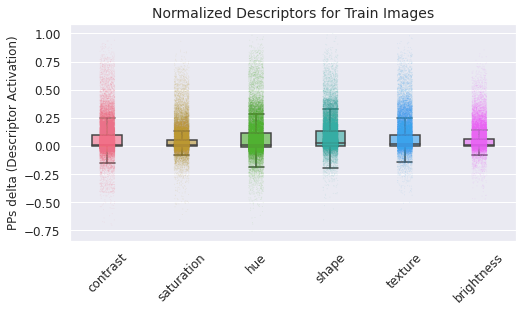

In [ ]:
#boxplot = Test_Local_descriptors.boxplot(column = 'delta',  by= 'modification', fontsize= 12, rot= 45, figsize = (10,5) )#, grid:bool = True, ax= None, layout = None, return_type= None, backend= None, **kwargs)
#
#sns.color_palette("hls", 8)
plt.figure(figsize=(8,4))
#plt.plot([-1, 5], [0.85, 0.85]) # plt.plot([x1, x2], [y, y]) # this line of code adds a horizontal solid line on the boxplot 
#plt.axhline(y=0.91, color='#00f7ff', linewidth=1.35)
##plt.axhline(y=0.85, color='#ff3300', linestyle='--', linewidth=1.35, label='Avg. Baseline Accuracy Value')
#plt.axhline(y=0.82, color='#00f7ff', linestyle='solid', linewidth=.85, label='Avg. Baseline Accuracy Value')

#boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_NoDAvsDA))
boxplot = sns.boxplot(x="modification", y="normalized_modifiers", data=Test_Local_descriptors, saturation=1.0, palette='husl', width=0.4, fliersize= 0) #boxprops={'facecolor':(.4, .6, .8, .5)},  boxprops=dict(alpha=.3)
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

boxplot = sns.stripplot(x="modification", y="normalized_modifiers", data=Test_Local_descriptors, marker="o", size=1, alpha=0.10, palette='husl')  #"hls")#color="black") #Spectral
boxplot.axes.set_title("Normalized Descriptors for Train Images", fontsize=14)
#boxplot.set_xlabel("Features", fontsize=14)
boxplot.set(xlabel=None)
# Rotate the labels by 45 degrees
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
boxplot.tick_params(labelsize=12)
boxplot.set_ylabel("PPs delta (Descriptor Activation)", fontsize=12)
#plt.legend(bbox_to_anchor=(0.31, 1.0), loc=2, borderaxespad=0.0, framealpha=1, facecolor ='white', frameon=True) # adds the label box for the "Avg. Baseline Accuracy Value" dashed line
#plt.savefig("Normalized_Descriptors_for_Train_Images.pdf", format="pdf", bbox_inches="tight")
plt.savefig("Normalized_Descriptors_for_Train_Images.png", bbox_inches='tight', pad_inches=0.1)
plt.show()